## Report project basic of mobile robotics - group 17
### About us

### Project description

### Code implementation
##### 0. Import needed libraries


In [1]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from utils.logger import * # Import logger
from global_navigation import *

##### 1. Computer Vision

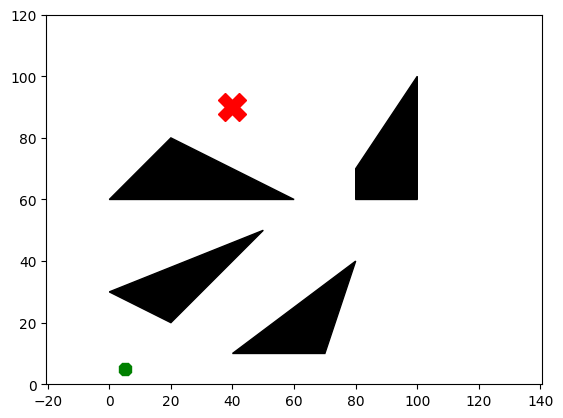

In [2]:
map = Map() # Create map object
initialPoint, finalPoint = map.getInitialFinalPoints()
map.plot(
    initialPoint=initialPoint,
    finalPoint=finalPoint,
)

##### 2. Global Navigation

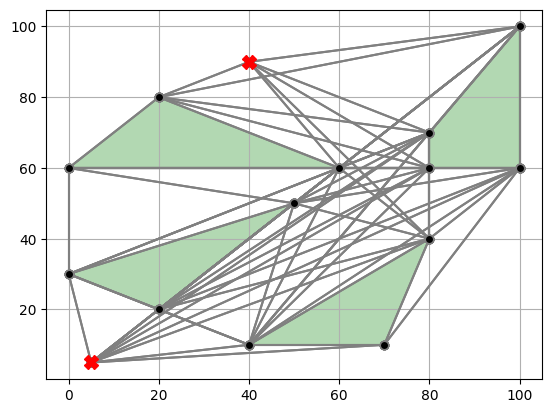

In [3]:
# Create visibility graph,and plot it 
lines , all_points = find_visible_lines(map.obstacles,initialPoint,finalPoint)
plot_visibility(lines, map.obstacles, initialPoint, finalPoint)

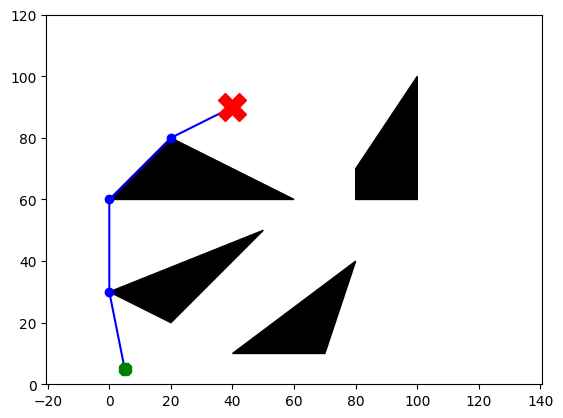

In [4]:
# Find the optimal path and plot it 
optimal_path = find_optimal_path(initialPoint, finalPoint, map.obstacles)
map.plot(initialPoint, finalPoint, path=optimal_path)

##### 3. Local Navigation

##### 4. Filtering

##### 5. Demo

In [5]:
##### Imports and variables definition #####
start = goal = None

try:
    ##### Connection to the robot #####
    client = ClientAsync()
    node = await client.wait_for_node()
    await node.lock()

    ##### Map creation #####
    map = Map()

    ##### Loop #####
    while True:

        # Final and initial position estimation and path planning
        if start == None or goal == None:
            start, goal = map.getInitialFinalPoints()

            # Get path [TODO]
        
        # Sensing [TODO]
        cameraPos, cameraOrientation = map.cameraRobotSensing()
        await node.wait_for_variables()
        if node["button.center"] == 1:
            raise CenterButtonPressed

        # Find out if the robot has been kidnapped [TODO]

        # Choose what to do based on the kidnapped state 
        if True:
            pass
            # Kidnapping management [TODO]
        else:
            pass
            # Position estimation [TODO]

            # Control [TODO]

            # Actuation [TODO]
except CenterButtonPressed:
    logger.info("Center button pressed")
except Exception as e:
    logger.error(e, exc_info=True)
finally:
    # If the connection is open, close it
    if client is not None:
        await client.close()

2023-11-20 18:49:36,958 - ERROR - [Errno 61] Connection refused
Traceback (most recent call last):
  File "/var/folders/y1/y80mbdt114j33fqvskk994k00000gn/T/ipykernel_71058/984970246.py", line 6, in <module>
    client = ClientAsync()
             ^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tdmclient/clientasync.py", line 42, in __init__
    super(ClientAsync, self).__init__(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tdmclient/client.py", line 98, in __init__
    self.connect()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tdmclient/client.py", line 112, in connect
    self.tdm = TDMConnection(self.tdm_addr, self.tdm_port)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tdmclient/tcp.py", line 104, in __init__
    self.io = TCPClientIO(h

NameError: name 'client' is not defined